In [1]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
import os
import cv2
from shutil import copyfile,move
import os
from sklearn.manifold import TSNE

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from   sklearn.decomposition import PCA
from   sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from   sklearn.preprocessing import StandardScaler

In [2]:
os.chdir('E:/poubelle/data/Ann/train_data.csv/')

In [25]:
%%time
df_tr=pd.read_csv('E:/poubelle/data/Ann/train_data.csv/train_data.csv',sep=',',header=None)
df_ts=pd.read_csv('E:/poubelle/data/Ann/test_data.csv/test_data.csv',sep=',',header=None)

Wall time: 11.9 s


In [6]:
print(df_tr.shape)
df_tr.head()

(12000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.713940,0.950166,0.082491,0.473774,0.374250,0.605040,0.412975,0.044910,0.632922,0.833006,...,0.370060,0.231853,0.551300,0.269233,0.647563,0.280602,0.497715,0.556270,0.698295,5.0
1,0.207442,0.159942,0.052641,0.051342,0.009720,0.682703,0.774166,0.558285,0.005905,0.201606,...,0.315708,0.012937,0.300337,0.284532,0.135431,0.678037,0.494685,0.203191,0.391003,7.0
2,0.325839,0.056225,0.160836,0.759836,0.403398,0.187141,0.340320,0.775668,0.459065,0.921677,...,0.593142,0.505503,0.378750,0.087939,0.530516,0.888135,0.407788,0.627825,0.673938,7.0
3,0.456670,0.540038,0.424184,0.660162,0.091114,0.249477,0.309704,0.465830,0.828901,0.344942,...,0.207742,0.155203,0.178659,0.261624,0.682500,0.771541,0.893934,0.707141,0.606010,1.0
4,0.364102,0.175911,0.483085,0.126983,0.284549,0.419236,0.075535,0.466388,0.358588,0.124850,...,0.345253,0.829508,0.604404,0.017116,0.671998,0.683932,0.895201,0.796101,0.432795,8.0


In [26]:
print(df_ts.shape)
df_ts.head()

(50000, 784)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.923635,0.845687,0.392889,0.615869,0.874534,0.740285,0.866167,0.874884,0.798678,0.921411,...,0.319343,0.117923,0.534830,0.471488,0.533066,0.043630,0.180847,0.914436,0.208952,0.818082
1,0.007767,0.670740,0.951021,0.824375,0.094717,0.497067,0.114710,0.437907,0.960489,0.240704,...,0.517363,0.613867,0.707880,0.117110,0.418698,0.645694,0.927810,0.680603,0.676337,0.950921
2,0.358045,0.464620,0.437333,0.050389,0.077008,0.442392,0.918650,0.050119,0.192834,0.104782,...,0.724851,0.801276,0.479539,0.329358,0.792401,0.280922,0.271480,0.439076,0.304218,0.776752
3,0.529594,0.952398,0.106095,0.145126,0.848198,0.623113,0.987542,0.208150,0.786005,0.177162,...,0.070347,0.207519,0.516150,0.301316,0.444116,0.568434,0.720637,0.000732,0.298122,0.661337
4,0.615061,0.910934,0.610735,0.926151,0.166474,0.094271,0.172607,0.641545,0.529498,0.750550,...,0.445006,0.977408,0.975606,0.552509,0.170555,0.971848,0.432990,0.183389,0.035798,0.067085


<AxesSubplot:xlabel='784'>

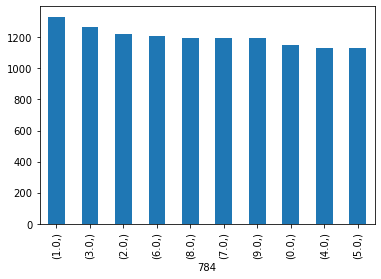

In [6]:
x=df_tr.iloc[:,0:784]
y=df_tr.iloc[:,784:]
y.value_counts().plot.bar()



#!pip install pivottablejs
from pivottablejs import pivot_ui
pivot_ui(y)

# fully connected model

In [115]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense ,Flatten ,Dropout ,Conv2D,MaxPooling2D
from tensorflow.keras.losses import BinaryCrossentropy,sparse_categorical_crossentropy
from sklearn.model_selection import train_test_split
xtr,xtst,ytr,ytst= train_test_split(x,y,test_size=.2,random_state=10)

In [143]:
scaler=StandardScaler()
df_xtr=scaler.fit_transform(xtr)
df_xtst=scaler.transform(xtst)
test_data=scaler.transform(df_ts)

In [119]:
model= Sequential()
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
#model.summary()


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [120]:
hist2=model.fit(df_xtr,ytr,validation_data=(df_xtst,ytst),batch_size=40,epochs=100,verbose=0)

In [121]:
fc_loss,fc_accuracy=model.evaluate(df_xtst,ytst)
print(fc_loss,fc_accuracy)

75/75 [==============================] - 0s 1ms/step - loss: 2.1605 - accuracy: 0.8021
2.1605398654937744 0.8020833134651184


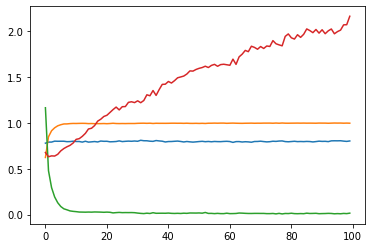

In [122]:
plt.plot(hist2.history['val_accuracy'])
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])

# cnn

In [144]:
df_xtr=df_xtr.reshape(df_xtr.shape[0], 28,28, 1)
df_xtst=df_xtst.reshape(df_xtst.shape[0], 28,28, 1)
test_data=test_data.reshape(test_data.shape[0], 28,28, 1)
df_xtr.shape ,df_xtst.shape,test_data.shape


((9600, 28, 28, 1), (2400, 28, 28, 1), (50000, 28, 28, 1))

In [65]:
mod = Sequential()

# add first convolutional layer
mod.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28, 1)))

# add second convolutional layer
mod.add(Conv2D(64, (3, 3), activation='relu'))

# add one max pooling layer 
mod.add(MaxPooling2D(pool_size=(2, 2)))

# add one dropout layer
mod.add(Dropout(0.125))

# add flatten layer
mod.add(Flatten())

# add dense layer
mod.add(Dense(128, activation='relu'))

# add another dropout layer
mod.add(Dropout(0.25))

# add dense layer
mod.add(Dense(10, activation='softmax'))

# complile the model and view its architecur
mod.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

mod.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [74]:
hist=mod.fit(df_xtr,ytr,validation_data=(df_xtst,ytst),epochs=20,verbose=1)

Epoch 1/20
300/300 [==============================] - 14s 46ms/step - loss: 0.0074 - accuracy: 0.9981 - val_loss: 0.5314 - val_accuracy: 0.9508
Epoch 2/20
300/300 [==============================] - 14s 46ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.4965 - val_accuracy: 0.9554
Epoch 3/20
300/300 [==============================] - 13s 45ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.5375 - val_accuracy: 0.9538
Epoch 4/20
300/300 [==============================] - 14s 45ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.5719 - val_accuracy: 0.9525
Epoch 5/20
300/300 [==============================] - 13s 45ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.5686 - val_accuracy: 0.9554
Epoch 6/20
300/300 [==============================] - 13s 45ms/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.5035 - val_accuracy: 0.9529
Epoch 7/20
300/300 [==============================] - 14s 48ms/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.5085 - val_accuracy:

In [111]:
cnn_loss,cnn_accuracy=mod.evaluate(df_xtst,ytst)
print(loss,accuracy)

75/75 [==============================] - 1s 8ms/step - loss: 0.6405 - accuracy: 0.9521
0.6405152678489685 0.9520833492279053


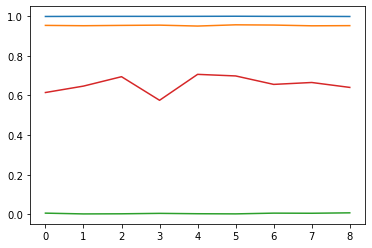

In [81]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [78]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [79]:
earl_stp=EarlyStopping(monitor='val_loss',patience=5)
cb=[earl_stp,ModelCheckpoint(filepath='maxcyril_ANN_exam_model.h5',monitor='val_loss',save_best_only=True)]
hist=mod.fit(df_xtr,ytr,validation_data=(df_xtst,ytst),epochs=20,verbose=1,callbacks=[cb])

Epoch 1/20
300/300 [==============================] - 12s 41ms/step - loss: 0.0064 - accuracy: 0.9983 - val_loss: 0.6147 - val_accuracy: 0.9533
Epoch 2/20
300/300 [==============================] - 17s 55ms/step - loss: 0.0025 - accuracy: 0.9989 - val_loss: 0.6472 - val_accuracy: 0.9517
Epoch 3/20
300/300 [==============================] - 13s 44ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.6946 - val_accuracy: 0.9533
Epoch 4/20
300/300 [==============================] - 13s 44ms/step - loss: 0.0053 - accuracy: 0.9989 - val_loss: 0.5756 - val_accuracy: 0.9546
Epoch 5/20
300/300 [==============================] - 14s 45ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.7064 - val_accuracy: 0.9500
Epoch 6/20
300/300 [==============================] - 13s 44ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.6984 - val_accuracy: 0.9563
Epoch 7/20
300/300 [==============================] - 13s 45ms/step - loss: 0.0064 - accuracy: 0.9989 - val_loss: 0.6557 - val_accuracy:

In [84]:
from tensorflow.math import confusion_matrix

<AxesSubplot:>

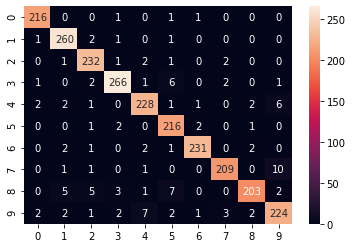

In [104]:
sns.heatmap(confusion_matrix(ytst,np.argmax(mod.predict(df_xtst), axis=-1)),annot=True,fmt="d")

# svm

In [29]:
from sklearn import svm
msv=svm.SVC()
msv.fit(df_xtr,ytr)

C:\Users\max_c\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [37]:
print(ytr)
ytr2=np.array(ytr).ravel()
ytst2=np.array(ytst).ravel()

       784
8282   6.0
63     5.0
5565   4.0
5120   7.0
7835   1.0
...    ...
7291   8.0
11633  1.0
1344   2.0
7293   6.0
1289   8.0

[9600 rows x 1 columns]


In [33]:
msv.score(df_xtst,ytst)

0.8375

0.8375
Wall time: 3min 6s


<AxesSubplot:>

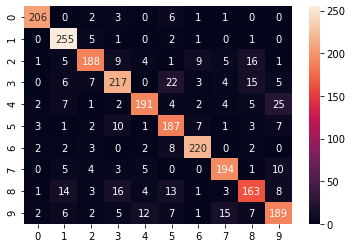

In [56]:
%%time
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix
import seaborn as sns
from sklearn import svm
msv2=svm.SVC()
msv2.fit(df_xtr,ytr2)
msv2.predict(df_xtst)
print(msv2.score(df_xtst,ytst2))
sns.heatmap(confusion_matrix(ytst2,msv2.predict(df_xtst)),annot=True,fmt="d")

0.745
Wall time: 1min 29s


<AxesSubplot:>

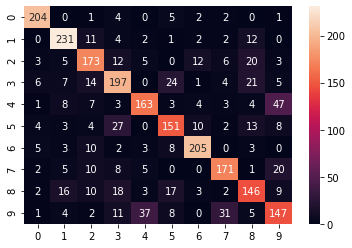

In [58]:
%%time
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix
import seaborn as sns
from sklearn import svm
msv3=svm.SVC(kernel='linear')
msv3.fit(df_xtr,ytr2)
msv3.predict(df_xtst)
print(msv3.score(df_xtst,ytst2))
sns.heatmap(confusion_matrix(ytst2,msv3.predict(df_xtst)),annot=True,fmt="d")

# knn

0.7908333333333334
Wall time: 2min 2s


<AxesSubplot:>

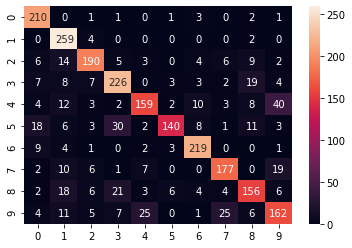

In [55]:
%%time
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(df_xtr,ytr2)
knn.predict(df_xtst)
print(knn.score(df_xtst,ytst2))
sns.heatmap(confusion_matrix(ytst2,knn.predict(df_xtst)),annot=True,fmt="d")

In [112]:
#base on accuracy the best model selected for this classification task is 
print(cnn_accuracy)

0.9520833492279053


In [145]:
#prediction
pred =np.argmax(mod.predict(test_data), axis=-1)
pred

array([6, 6, 8, ..., 6, 0, 3], dtype=int64)

In [146]:
#create id column
id=np.array(range(len(pred)))
#create pandas DataFrame
df=pd.DataFrame({'id':id, 'category':list(pred)},columns=['id','category'])

In [147]:
df

,id,category
0,0,6
1,1,6
2,2,8
3,3,4
4,4,8
...,...,...
49995,49995,1
49996,49996,3
49997,49997,6
49998,49998,0


In [148]:
df.to_csv("ann_max_cyril_DS20.csv",encoding='UTF-8',index=False)